In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,\
                            precision_score,\
                            f1_score,\
                            recall_score,\
                            classification_report,\
                            roc_auc_score,roc_curve,auc

In [2]:
path=r"C:\Users\tanma\DATASCIENCE\Machinelearning\Interncarrier_assignment_cancer\data.csv"
df=pd.read_csv(path)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

*categorical columns*

In [4]:
df.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

*Numerical columns*

In [5]:
df.select_dtypes(exclude='object').columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

*Finding Null Values*

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

*Fill the Null Values*

In [7]:
df=df.fillna(method='bfill')
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


*check null value again*

In [8]:
df.isnull().sum()*100/len(df)

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

*separating id columns*

In [9]:
ids=df['id']
ids

0        842302
1        842517
2      84300903
3      84348301
4      84358402
         ...   
564      926424
565      926682
566      926954
567      927241
568       92751
Name: id, Length: 569, dtype: int64

In [10]:
col=['id','Unnamed: 32']
df=df.drop(col,axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**categorical to numerical--Label Encoder**

In [11]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols[1:]
for i in cat_cols:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    for i in df:
        df[i]=le.fit_transform(df[i])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,370,1,455,452,444,531,521,526,416,...,425,41,497,516,358,516,520,483,485,506
1,1,426,186,486,513,120,215,321,396,219,...,419,199,465,511,158,210,278,401,222,375
2,1,406,324,478,487,403,459,478,516,348,...,399,261,455,491,287,464,438,468,445,361
3,1,98,297,164,95,471,533,507,493,426,...,215,298,281,194,408,524,511,479,499,533
4,1,418,60,493,506,332,414,480,492,216,...,381,28,453,470,239,245,415,363,81,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,438,370,503,522,410,364,509,522,173,...,426,293,480,518,263,255,423,453,21,133
565,1,413,463,483,499,295,312,415,483,187,...,401,494,459,493,116,218,350,364,152,63
566,1,340,458,410,421,115,308,329,335,94,...,328,460,390,413,106,371,366,317,40,244
567,1,429,467,500,501,442,530,530,531,413,...,431,500,497,502,367,525,534,482,472,514


*checking values*

In [12]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Outlier Analysis**

In [13]:
Q1=np.percentile(df['radius_mean'],25)   #lb
Q3=np.percentile(df['radius_mean'],75)   #ub
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
c1=df['radius_mean']<lb
c2=df['radius_mean']>ub
c=c1|c2
outlier_df=df[c]
outlier_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


**finding out non outlier**

In [14]:
Q1=np.percentile(df['radius_mean'],25)   #lb
Q3=np.percentile(df['radius_mean'],75)   #ub
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
c1=df['radius_mean']>lb
c2=df['radius_mean']<ub
c=c1&c2
non_outlier_df=df[c]
non_outlier_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,370,1,455,452,444,531,521,526,416,...,425,41,497,516,358,516,520,483,485,506
1,1,426,186,486,513,120,215,321,396,219,...,419,199,465,511,158,210,278,401,222,375
2,1,406,324,478,487,403,459,478,516,348,...,399,261,455,491,287,464,438,468,445,361
3,1,98,297,164,95,471,533,507,493,426,...,215,298,281,194,408,524,511,479,499,533
4,1,418,60,493,506,332,414,480,492,216,...,381,28,453,470,239,245,415,363,81,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,438,370,503,522,410,364,509,522,173,...,426,293,480,518,263,255,423,453,21,133
565,1,413,463,483,499,295,312,415,483,187,...,401,494,459,493,116,218,350,364,152,63
566,1,340,458,410,421,115,308,329,335,94,...,328,460,390,413,106,371,366,317,40,244
567,1,429,467,500,501,442,530,530,531,413,...,431,500,497,502,367,525,534,482,472,514


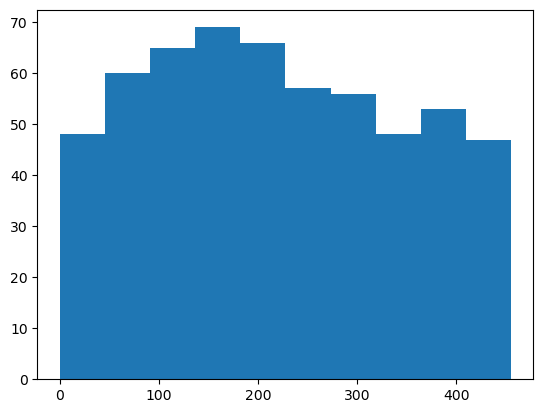

In [15]:
plt.hist(df['radius_mean'])
plt.hist(outlier_df['radius_mean'])
plt.show()

**Feature Selection**

*Deviding into input & output*

In [18]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

*Deviding into x_train & y_train*

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                              test_size=0.30,
                                              random_state=42)

**Model developing**

*Logistic Regression*

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)


DecisionTreeClassifier()

**Hypertunning Model**

In [25]:
from sklearn.model_selection import GridSearchCV,cross_val_score
dt_params=[keys for keys in dtree.get_params()]
param_grid={
    'criterion':['gini','entropy'],  
    'max_depth':[3,5,10],
    'max_features':['sqrt','log2'],
    'random_state':[0,42]    
     }
grid_search=GridSearchCV(dtree,
                        param_grid,
                        scoring='accuracy',
                        cv=5,
                        verbose=True)

grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_
best_score=grid_search.best_score_
print("best params:",best_params)
print("best train accuracy :",best_score)

df

Fitting 5 folds for each of 24 candidates, totalling 120 fits
best params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'random_state': 0}
best train accuracy : 0.9345886075949368


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,370,1,455,452,444,531,521,526,416,...,425,41,497,516,358,516,520,483,485,506
1,1,426,186,486,513,120,215,321,396,219,...,419,199,465,511,158,210,278,401,222,375
2,1,406,324,478,487,403,459,478,516,348,...,399,261,455,491,287,464,438,468,445,361
3,1,98,297,164,95,471,533,507,493,426,...,215,298,281,194,408,524,511,479,499,533
4,1,418,60,493,506,332,414,480,492,216,...,381,28,453,470,239,245,415,363,81,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,438,370,503,522,410,364,509,522,173,...,426,293,480,518,263,255,423,453,21,133
565,1,413,463,483,499,295,312,415,483,187,...,401,494,459,493,116,218,350,364,152,63
566,1,340,458,410,421,115,308,329,335,94,...,328,460,390,413,106,371,366,317,40,244
567,1,429,467,500,501,442,530,530,531,413,...,431,500,497,502,367,525,534,482,472,514


**Model Prediction**

In [26]:
y_pred_log=dtree.predict(x_test)

cancer_test_df=pd.DataFrame(zip(ids,y_pred_log),
                           columns=['id','diagnosis'])

In [27]:
d={0:'N',1:'y'}
cancer_test_df['diagnosis']=cancer_test_df['diagnosis'].map(d)
cancer_test_df

,id,diagnosis
0,842302,N
1,842517,y
2,84300903,y
3,84348301,N
4,84358402,N
...,...,...
166,87127,N
167,8712729,N
168,8712766,N
169,8712853,y


In [29]:
cancer_test_df.to_csv('cancer_test.csv',index=False)